<a href="https://colab.research.google.com/github/komalaftab/convolutional-neural-network/blob/master/cat_vs_dog_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cats Vs Dogs image classifier**

**Loading dataset**


You can load the dataset from the [kaggle website.](https://www.kaggle.com/c/dogs-vs-cats/data).


In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-04-28 19:28:58--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  61.2MB/s    in 1.1s    

2020-04-28 19:29:00 (61.2 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



**Unzip data using python code:**

The following python code will use the OS library, giving you access to the file system, and the zipfile library allowing you to unzip the data.

In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

**Let's define the directories.**


Dataset containing three subsets: a training set with 1,000 samples of each class, a validation set with 500 samples of each class, and a test set with 500 samples of each class.

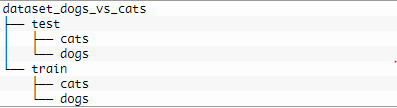

In [0]:

base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')



Now let's see the filenames look like dogs and cats train directories.

In [4]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.998.jpg', 'cat.981.jpg', 'cat.371.jpg', 'cat.177.jpg', 'cat.461.jpg', 'cat.846.jpg', 'cat.676.jpg', 'cat.848.jpg', 'cat.534.jpg', 'cat.419.jpg']
['dog.81.jpg', 'dog.659.jpg', 'dog.672.jpg', 'dog.110.jpg', 'dog.382.jpg', 'dog.838.jpg', 'dog.342.jpg', 'dog.192.jpg', 'dog.941.jpg', 'dog.375.jpg']


**Let's find the total no of cats and dogs in train ,validation and test dataset.**

In [5]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))



total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


**Visualizing data:**

In [0]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

**Now, display a batch of 8 cat and 8 dog pictures. You can rerun the cell to see a fresh batch each time:**

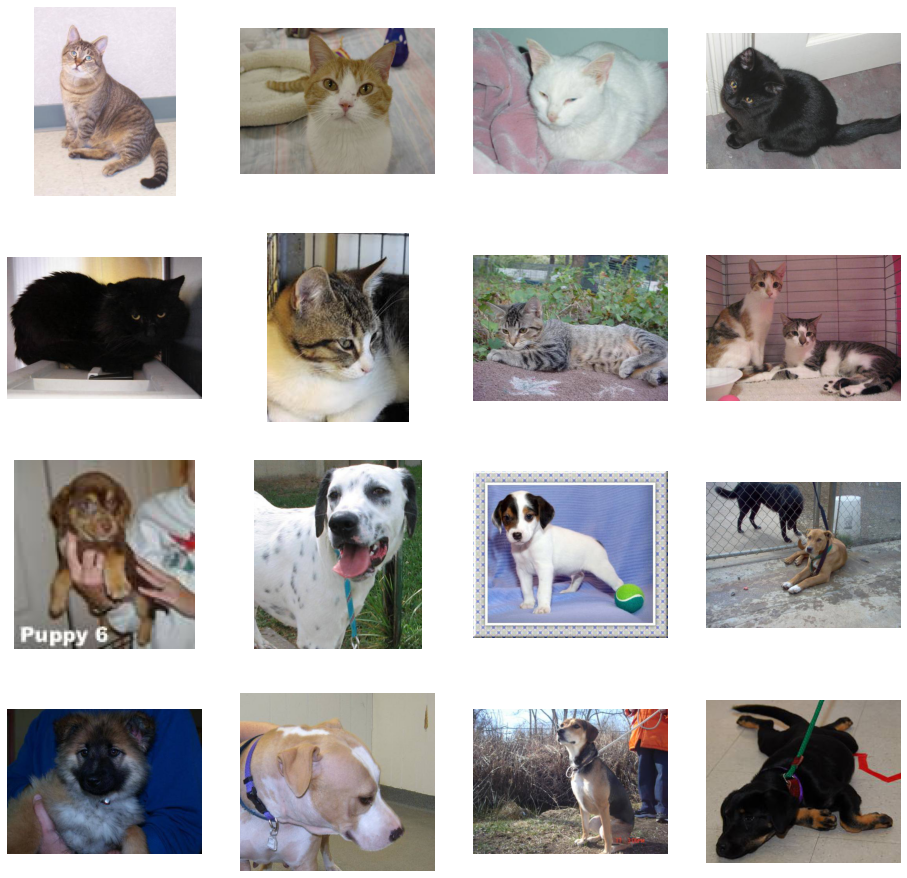

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

**Building a Small Model:**

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [10]:
#The model.summary() method call prints a summary of the NN

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

compile model:

**We train our model with the binary_crossentropy loss, because it's a binary classification problem and our final activation is a sigmoid.We will use the rmsprop optimizer with a learning rate of 0.001. During training, we will want to monitor classification accuracy.
Using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)**

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

Data preprocessing:

In keras it can be done via thekeras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs: fit, evaluate_generator, and predict_generator.

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255.,rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**Training:**

Let's train on all 2,000 images available, for 15 epochs, and validate on all 1,000 test images.

In [13]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_steps=50,
                              verbose=2)

Epoch 1/20
100/100 - 32s - loss: 0.8311 - accuracy: 0.5116 - val_loss: 0.7033 - val_accuracy: 0.5032
Epoch 2/20
100/100 - 31s - loss: 0.6926 - accuracy: 0.5742 - val_loss: 0.6979 - val_accuracy: 0.5793
Epoch 3/20
100/100 - 32s - loss: 0.6597 - accuracy: 0.6212 - val_loss: 0.6047 - val_accuracy: 0.6637
Epoch 4/20
100/100 - 31s - loss: 0.6300 - accuracy: 0.6446 - val_loss: 0.5847 - val_accuracy: 0.6720
Epoch 5/20
100/100 - 32s - loss: 0.6054 - accuracy: 0.6734 - val_loss: 0.5789 - val_accuracy: 0.6751
Epoch 6/20
100/100 - 31s - loss: 0.6009 - accuracy: 0.6910 - val_loss: 0.5513 - val_accuracy: 0.7223
Epoch 7/20
100/100 - 32s - loss: 0.5787 - accuracy: 0.6932 - val_loss: 0.5499 - val_accuracy: 0.7307
Epoch 8/20
100/100 - 32s - loss: 0.5727 - accuracy: 0.7048 - val_loss: 0.5407 - val_accuracy: 0.7246
Epoch 9/20
100/100 - 31s - loss: 0.5675 - accuracy: 0.7061 - val_loss: 0.5860 - val_accuracy: 0.7107
Epoch 10/20
100/100 - 31s - loss: 0.5550 - accuracy: 0.7189 - val_loss: 0.5595 - val_accura

**Evaluating Accuracy and Loss for the Model**:

Let's plot the training/validation accuracy and loss as collected during training:

Text(0.5, 1.0, 'Training and validation loss')

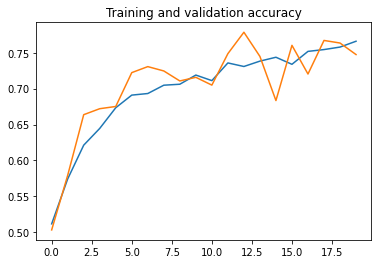

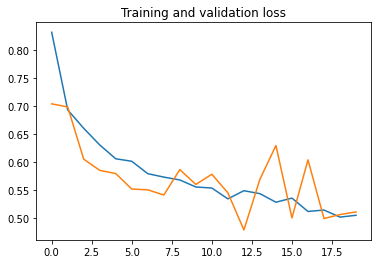

In [14]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [0]:
model_2 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(32, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3) ,activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(128, (3,3) ,activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'), 
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
    #tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 256 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dropout((0.4)),




    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])
model_2.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

In [16]:
history_1= model_2.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=50,
                              validation_steps=50,
                              verbose=2)

Epoch 1/50
100/100 - 36s - loss: 0.6934 - accuracy: 0.5035 - val_loss: 0.6925 - val_accuracy: 0.5064
Epoch 2/50
100/100 - 35s - loss: 0.6880 - accuracy: 0.5559 - val_loss: 0.6752 - val_accuracy: 0.5657
Epoch 3/50
100/100 - 35s - loss: 0.6749 - accuracy: 0.5833 - val_loss: 0.6459 - val_accuracy: 0.6332
Epoch 4/50
100/100 - 35s - loss: 0.6560 - accuracy: 0.6215 - val_loss: 0.6348 - val_accuracy: 0.6379
Epoch 5/50
100/100 - 35s - loss: 0.6481 - accuracy: 0.6272 - val_loss: 0.6234 - val_accuracy: 0.6669
Epoch 6/50
100/100 - 35s - loss: 0.6325 - accuracy: 0.6430 - val_loss: 0.6174 - val_accuracy: 0.6772
Epoch 7/50
100/100 - 35s - loss: 0.6256 - accuracy: 0.6498 - val_loss: 0.5969 - val_accuracy: 0.6733
Epoch 8/50
100/100 - 35s - loss: 0.6282 - accuracy: 0.6427 - val_loss: 0.5930 - val_accuracy: 0.6764
Epoch 9/50
100/100 - 35s - loss: 0.6210 - accuracy: 0.6604 - val_loss: 0.5823 - val_accuracy: 0.6830
Epoch 10/50
100/100 - 35s - loss: 0.6170 - accuracy: 0.6668 - val_loss: 0.5804 - val_accura

**Deploy model on colab**:


Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a dog or a cat.

In [21]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

Saving CAT.jpg to CAT (1).jpg
[0.]
CAT.jpg is a cat


#how to save model?

In [0]:
model.save('cats_and_dogs_small_2.h5')